In [64]:
# Function to plot covectors
def plot_covector(covector, kappa, fig_axis):
#
# covector is an array of two components
# kappa is an array containing the list of lines of constant level
# fig_axis is the plotting axis.
#

#
# Strategy
#   
# 1. For each kappa entry, calculate the equation of the line
#    print('plot_covector: covector = ', covector)
#    print('plot_covector: kappa = ', kappa)
# 1a. Note:
#
# 1. Both covector components are zero:
#        Result: Exception raised
# 2. Vertical line +x axis: covector[0]>0, covector[1]=0
#        Result: m=inf, b=inf, theta=0 (actually result of arctan2)       
# 3. Horizontal line +y axis: covector[0]=0, covector[1]>0
#        Result: m=0, b=kappa, theta=pi/2 (actually result of arctan2)
# 4. Vertical line -x axis:  covector[0]<0, covector[1]=0
#        Result: m=inf, b=inf, theta=pi (actually result of arctan2)
# 5. Horizontal line -y axis:  covector[0]=0, covector[1]<0
#        Result: m=0, b=kappa, theta=3pi/2 (actually result of arctan2)        
#

    if (covector[0]==0 and covector[1]==0):
        raise Exception('Error: Both covector components cannot be zero.')
        
# Get parameters of bounding box
    (x_lim_left, x_lim_right)=fig_axis.get_xlim()
    (y_lim_bottom, y_lim_top)=fig_axis.get_ylim()
#    print('plot_covector: x_lim_left = ', x_lim_left)
#    print('plot_covector: x_lim_right = ', x_lim_right)
#    print('plot_covector: y_lim_top = ', y_lim_top)
#    print('plot_covector: y_lim_bottom = ', y_lim_bottom)       
       
# Loop over covectors

    for kappa_current in kappa:

# theta_kappa = angle that covector component vector makes with +x axis.
        theta_kappa = np.arctan2(covector[1], covector[0])

# b = intercept of kappa line
# m = slope of kappa line
        
        if covector[1] == 0:
            b_kappa = np.inf
            m_kappa = np.inf
        elif covector[0] == 0:
            b_kappa = kappa_current
            m_kappa = 0
        else:
            b_kappa = kappa_current/np.sin(theta_kappa)
            m_kappa = -covector[0]/covector[1]

#        print('plot_covector: kappa_current = ', kappa_current)
#        print('plot_covector: theta_kappa = ', theta_kappa)
#        print('plot_covector: b_kappa = ', b_kappa)
#        print('plot_covector: m_kappa = ', m_kappa)
        
# 2. Determine the intersections of the kappa line with all four extended
# figure boundary lines.  Counterclockwise from +x axis.

        x_intersect=np.full(4,None)
        y_intersect=np.full(4,None)

        if np.isinf(m_kappa): # check top and bottom only if infinite slope
            y_intersect[0] = y_lim_top 
            x_intersect[0] = kappa_current*np.sign(covector[0])
            y_intersect[1] = y_lim_bottom
            x_intersect[1] = kappa_current*np.sign(covector[0])
        elif m_kappa == 0:  # check left and right only if zero slope
            x_intersect[0] = x_lim_right 
            y_intersect[0] = kappa_current*np.sign(covector[1])
            x_intersect[1] = x_lim_left
            y_intersect[1] = kappa_current*np.sign(covector[1])
        else: # all four lines are valid
            x_intersect[0] = x_lim_right
            y_intersect[0] = m_kappa*x_lim_right+b_kappa
            x_intersect[1] = (y_lim_top-b_kappa)/m_kappa
            y_intersect[1] = y_lim_top
            x_intersect[2] = x_lim_left
            y_intersect[2] = m_kappa*x_lim_left+b_kappa
            x_intersect[3] = (y_lim_bottom-b_kappa)/m_kappa
            y_intersect[3] = y_lim_bottom

#        for i_intersect in range(len(x_intersect)):
#            print('plot_covector: intersection index = ', i_intersect)
#            print('plot_covector: x_intersect = ', x_intersect[i_intersect])
#            print('plot_covector: y_intersect = ', y_intersect[i_intersect])

#
# 3. Compute the distance from the kappa point to each intersection.
# 3a. Package the intersections into an array of vectors

        intersect_vec = np.array(tuple(zip(x_intersect, y_intersect)), dtype=object)
#        print('plot_covector:intersect_vec = ', intersect_vec)
        
        filtered_vec = intersect_vec[intersect_vec!=None].reshape(-1,2)
#        print('plot_covector:filtered_vec = ', filtered_vec)

# Compute the cross products with the covector and store the signs
# The sign should indicate which side of the line defined by the 
# direction of the covector the intersection point lies on.
#        

        filtered_cross = np.cross(covector, filtered_vec)
#        print('plot_covector:filtered_cross = ', filtered_cross)

#
# The two closest intersections are the points to draw a line between.
# This pair should be stored and have a line plotted between them.
#

        unit_covector = covector/np.sqrt(np.dot(covector,covector))
#        print('plot_covector:unit_covector = ', unit_covector)

        kappa_unit_covector = kappa_current * unit_covector
#        print('plot_covector:kappa_unit_covector = ', kappa_unit_covector)

# Differences between intersections and kappa*covector_unit

        delta_vec = filtered_vec-kappa_unit_covector

#        print('plot_covector:delta_vec = ', delta_vec)
#        print('plot_covector:delta_vec shape = ', delta_vec.shape)

#
#
#  v1x v1y    v1x v2x v3x
#  v2x v2y    v1y v2y v3y
#  v3x v3y
#
#

# transpose
#        print('plot_covector:np.transpose(delta_vec) = ', np.transpose(delta_vec))
#        print('plot_covector:np.transpose(delta_vec).shape = ', np.transpose(delta_vec).shape)

# magnitude**2
        delta_vec_mag = np.matmul(delta_vec, np.transpose(delta_vec))
#        print('plot_covector:delta_vec_mag = ', delta_vec_mag)
#        print('plot_covector:delta_vec_mag.shape = ', delta_vec_mag.shape)

# extract the diagonal
        delta_vec_mag_diag = np.diag(delta_vec_mag)
#        print('plot_covector:delta_vec_mag_diag = ', delta_vec_mag_diag)

#
# choose based on closest pair with opposite cross product signs
#

        filtered_cross_nonpos = filtered_cross <= 0
        filtered_cross_nonneg = filtered_cross >= 0

#        print('plot_covector:filtered_cross_nonpos = ', filtered_cross_nonpos)
#        print('plot_covector:filtered_cross_nonneg = ', filtered_cross_nonneg)

#        print('plot_covector:delta_vec_mag_diag[filtered_cross_nonpos] = ', delta_vec_mag_diag[filtered_cross_nonpos])
#        print('plot_covector:delta_vec_mag_diag[filtered_cross_nonneg] = ', delta_vec_mag_diag[filtered_cross_nonneg])

        delta_vec_mag_diag_nonpos_min_idx = np.argmax(delta_vec_mag_diag[filtered_cross_nonpos])
        delta_vec_mag_diag_nonneg_min_idx = np.argmax(delta_vec_mag_diag[filtered_cross_nonneg])

#        print('plot_covector:delta_vec_mag_diag_nonpos_min_idx = ', delta_vec_mag_diag_nonpos_min_idx)
#        print('plot_covector:delta_vec_mag_diag_nonneg_min_idx = ', delta_vec_mag_diag_nonneg_min_idx)

#
# filtered_vec
#

        filtered_plot = np.full((2,2),None)
        filtered_plot[0] = filtered_vec[filtered_cross_nonpos][delta_vec_mag_diag_nonpos_min_idx]
        filtered_plot[1] = filtered_vec[filtered_cross_nonneg][delta_vec_mag_diag_nonneg_min_idx]

#        print('plot_covector:filtered_vec[filtered_cross_nonpos] = ', filtered_vec[filtered_cross_nonpos])
#        print('plot_covector:filtered_vec[filtered_cross_nonneg] = ', filtered_vec[filtered_cross_nonneg])

#        print('plot_covector:filtered_plot = ', filtered_plot)
#        print('plot_covector:filtered_plot[:,0] = ', filtered_plot[:,0])
#        print('plot_covector:filtered_plot[:,1] = ', filtered_plot[:,1])

#
# Plot result
#

        ax.plot(filtered_plot[:,0], filtered_plot[:,1], 'k')
    
    return

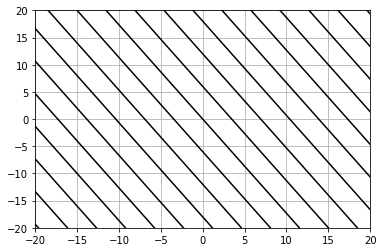

In [75]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()  # Create a figure containing a single axes.
xmin=-20
xmax=20
ymin=-20
ymax=20
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.grid(True)
 
kappa=np.arange(-30,30,3) # scale factor for covector
alpha=np.array([np.sqrt(3)/2,1/2]) # covector
plot_covector(covector=alpha, kappa=kappa, fig_axis=ax)
plt.show()
#

In [57]:
20/np.sqrt(3)*2

23.094010767585033